In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import freqopttest.util as util
import freqopttest.data as data
import freqopttest.kernel as kernel
import freqopttest.tst as tst
import collections
from collections import defaultdict
import freqopttest.glo as glo
from pathlib import Path
import sys
import time
import os
import pandas as pd
from concurrent.futures import ThreadPoolExecutor
import pickle
from concurrent.futures import ProcessPoolExecutor
from concurrent.futures import ThreadPoolExecutor

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [2]:
symbol ='OE1'

sys.path.insert(0, '/directory/tothe/handshakefile/')
sys.path.append('/home/ak/Documents/PaperCode/stylised_facts')
mainPath = '/media/ak/T71/August11th2022Experiments/'
hurstPath = os.path.join(mainPath, 'HurstDicts')
mfdfaDataFrames = '/media/ak/T71/August11th2022Experiments/mfdfaDataFrames'  # Input Files
LinearMMDOutputFiles = '/media/ak/T71/August11th2022Experiments/ExperimentOne/TestMMDOutputFiles'  # Location to Save Files
experimentOne = '/media/ak/T71/August11th2022Experiments/ExperimentOne'
oe1path = os.path.join(experimentOne, symbol)


In [3]:
def summary_statistics_short(dfs):
    summary_data = []

    for (shift, window), df in dfs.items():
        total_rows = len(df)
        h0_rejected_count = df["H0_rejected"].sum()
        h0_rejected_percentage = (h0_rejected_count / total_rows) * 100
        median_test_stat = df["Test_stat"].median()
        median_p_value = df["P-value"].median()

        summary_data.append({
            "Shift": shift,
            "Window": window,
            "H0_rejected_percentage": h0_rejected_percentage,
            "Median_test_stat": median_test_stat,
            "Median_p_value": median_p_value
        })

    summary_df = pd.DataFrame(summary_data)
    # Format the H0_rejected_percentage column as a percentage
    summary_df["H0_rejected_percentage"] = summary_df["H0_rejected_percentage"].apply(lambda x: f"{x:.2f}%")
    summary_df["Median_test_stat"] = summary_df["Median_test_stat"].round(2)
    summary_df["Median_p_value"] = summary_df["Median_p_value"].round(2)
    return summary_df

def process_defaultdict(data):
    processed_data = defaultdict(list)

    for key, value in data.items():
        shift, window = key
        h0_rejected_percentage = value['H0_rejected'] / len(value['p_values']) * 100
        median_test_stat = value['test_stats'].median()
        median_p_value = value['p_values'].median()

        processed_data['Shift'].append(shift)
        processed_data['Window'].append(window)
        processed_data['H0_rejected_percentage'].append(h0_rejected_percentage)
        processed_data['Median_test_stat'].append(median_test_stat)
        processed_data['Median_p_value'].append(median_p_value)


In [4]:

def get_filtered_files(path, bar_choice):
    return sorted([f for f in os.listdir(path) if str(bar_choice) in f])


def read_pickle_file(file_path, bar_choice, variable):
    return pd.read_pickle(file_path)[str(bar_choice)][str(variable)]


def create_dataframe_from_dict(unpickled_all_values):
    return pd.DataFrame.from_dict(unpickled_all_values).fillna(0)


def save_dataframe_to_pickle(df, save_path, protocol=pickle.HIGHEST_PROTOCOL):
    with open(save_path, 'wb') as f:
        pickle.dump(df, f, protocol=protocol)
    print(f'saving: {save_path}')


def process_symbol(symbol):
    symbol_analyzer = SymbolAnalyzer(symbol=symbol, experimentOne=experimentOne,
                                     bars=['tick', 'calendar', 'dollar', 'volume'])
    symbol_analyzer.check_directory()
    symbol_analyzer.process_bars(max_workers=4)


def process_symbols(symbols, max_symbol_analyzers):
    """
    Process a list of symbols in parallel.

    :param symbols: list, a list of symbols to process.
    :param max_symbol_analyzers: int, the maximum number of concurrent symbol analyzers.
    """
    with ThreadPoolExecutor(max_workers=max_symbol_analyzers) as executor:
        futures = [executor.submit(process_symbol, symbol) for symbol in symbols]

    for future in futures:
        future.result()

In [5]:
files = os.listdir(oe1path)
dollarfiles = [f for f in files if str('dollar') in f]
volumefiles = [f for f in files if str('volume') in f]
tickfiles = [f for f in files if str('tick') in f]
tauDict = dict()
alphaDict = dict()

In [6]:
####### params ###### 
barChoice = 'dollar'

choiceBarFiles = [f for f in files if str(barChoice) in f]
choice_of_file = choiceBarFiles[0]
choice_of_file_Loc = os.path.join(oe1path, choice_of_file)

mfdfaKeys = ['n_F', 'list_H', 'list_H_intercept', 'tau', 'alpha', 'mfSpect']
pickleKeys = ['micro_price_change',
 'arrival_rates',
 'gk_vol',
 'median_traded_volume',
 'dollar']

In [7]:
default_dict = pd.read_pickle(choice_of_file_Loc)
# default_dict['dollar']


In [8]:
read_pickle_file(choice_of_file_Loc, bar_choice=barChoice, variable= 'tau')

array([-2.62712004e+00, -2.57236850e+00, -2.51798450e+00, -2.46398696e+00,
       -2.41039094e+00, -2.35720651e+00, -2.30443773e+00, -2.25208177e+00,
       -2.20012816e+00, -2.14855832e+00, -2.09734522e+00, -2.04645320e+00,
       -1.99583792e+00, -1.94544634e+00, -1.89521665e+00, -1.84507816e+00,
       -1.79495107e+00, -1.74474603e+00, -1.69436335e+00, -1.64369183e+00,
       -1.59260689e+00, -1.54096770e+00, -1.48861246e+00, -1.43535055e+00,
       -1.38094863e+00, -1.32510596e+00, -1.26741011e+00, -1.20725928e+00,
       -1.14373181e+00, -1.07538542e+00, -1.00000000e+00, -9.14393336e-01,
       -8.14705345e-01, -6.97874714e-01, -5.64757697e-01, -4.23447828e-01,
       -2.88985921e-01, -1.77296614e-01, -9.73246775e-02, -4.79545941e-02,
       -2.13409002e-02, -8.53622318e-03, -2.95069456e-03, -7.90143384e-04,
       -1.58496432e-04, -1.77256557e-04, -4.55323451e-04, -8.22880282e-04,
       -1.20797398e-03, -1.58128629e-03, -1.93184029e-03, -2.25641708e-03,
       -2.55498092e-03, -

In [9]:
files = get_filtered_files(oe1path,'volume' )
# files

In [10]:
# pd.read_pickle(os.path.join(oe1path, files[2]))

In [11]:
# read_pickle_file(file_path= os.path.join(oe1path, files[2]), 
#                  bar_choice=barChoice, 
#                  variable = 'tau' )

In [12]:
testClass = SymbolAnalyzer('OE1',experimentOne,'volume')

NameError: name 'SymbolAnalyzer' is not defined

In [13]:
testClass.resultsPath

NameError: name 'testClass' is not defined

In [14]:

class SymbolAnalyzer:
    """
    A class to analyze symbols using multiple bar choices and save the results.
    """
    def __init__(self, symbol='FB1', experimentOne='', bars=None):
        """
        Initialize the SymbolAnalyzer with a symbol, base directory, and a list of bars.

        :param symbol: str, the symbol to analyze.
        :param experimentOne: str, the base directory containing the symbol data.
        :param bars: list, a list of bar choices to process (e.g., ['tick', 'calendar', 'dollar', 'volume']).
        """
        self.symbol = symbol
        self.symbolPath = os.path.join(experimentOne, str(self.symbol))
        self.resultsMainPath = '/media/ak/T71/August11th2022Experiments/mfdfaDataFrames'
        self.resultsPath = os.path.join(self.resultsMainPath, self.symbol, 'results')
        os.makedirs(self.resultsPath, exist_ok=True)
        self.bars = bars or ['tick']
        self.variables = ['n_F', 'list_H', 'list_H_intercept', 'tau', 'alpha', 'mfSpect']

    def check_directory(self):
        """
        Print the symbol path and a boolean indicating if the directory exists.
        """
        print(self.symbolPath, os.path.isdir(self.symbolPath))

    def get_files(self, bar):
        """
        Get the list of files for a specific bar choice.

        :param bar: str, the bar choice to search for in the filenames.
        :return: list, a list of filenames containing the specific bar choice.
        """
        files = [f for f in os.listdir(self.symbolPath) if str(bar) in f]
        return files

    def process_file(self, file, bar, variable):
        """
        Process a single file for a specific bar and variable.

        :param file: str, the file to process.
        :param bar: str, the bar choice.
        :param variable: str, the variable to extract from the file.
        :return: tuple, the index and variable_array extracted from the file, or (None, None) if an error occurs.
        """
        try:
            file_loc = os.path.join(self.symbolPath, file)
            variable_array = pd.read_pickle(file_loc)[str(bar)][str(variable)]
            index = file.split('_')[1].split('.')[0]
            return index, variable_array
        except TypeError:
            print(f"Error processing file {file} for bar {bar} and variable {variable}.")
            return None, None

    def process_files_parallel(self, files, bar, max_workers=4):
        """
        Process a list of files in parallel for a specific bar choice and save the results.

        :param files: list, a list of files to process.
        :param bar: str, the bar choice.
        :param max_workers: int, the maximum number of concurrent workers to use.
        """
        for variable in self.variables:
            with ThreadPoolExecutor(max_workers=max_workers) as executor:
                results = [executor.submit(self.process_file, file, bar, variable) for file in files]
            # result_dict = {r.result()[0]: r.result()[1] for r in results}
            result_dict = {r.result()[0]: r.result()[1] for r in results if r.result()[0] is not None}
            bar_results_path = os.path.join(self.resultsPath, bar)
            os.makedirs(bar_results_path, exist_ok=True)
            save_path = os.path.join(bar_results_path, f"{self.symbol}_{bar}_{variable}.pkl")
            self.save_dataframe_to_pickle(pd.DataFrame(result_dict), save_path)

    def save_dataframe_to_pickle(self, df, save_path, protocol=pickle.HIGHEST_PROTOCOL):
        with open(save_path, 'wb') as f:
            pickle.dump(df, f, protocol=protocol)
        print(f'saving: {save_path}')

    def process_bars(self, max_workers=4):
        """
        Process all the bar choices for a symbol using the SymbolAnalyzer class.

        :param max_workers: int, the maximum number of concurrent workers to use.
        """
        for bar in self.bars:
            files = self.get_files(bar)
            self.process_files_parallel(files, bar, max_workers)


# if __name__ == '__main__':
#     experimentOne = experimentOne
#     symbols = ['TY1', 'RX1', 'XM1', 'FV1', 'XM1', 'KE1', 'JB1', 'TU1', 'US1', 'G_1', 'FB1','DU1' ]
#     max_symbol_analyzers = 4

#     process_symbols(symbols, max_symbol_analyzers)

In [15]:
hurstFiles = [f for f in os.listdir(hurstPath) if str('Hurst') in f]
rhoFiles = hurstFiles = [f for f in os.listdir(hurstPath) if str('Rho') in f]

In [16]:
rhoFileIdx = 10
rhoFileLoc = os.path.join(hurstPath, rhoFiles[rhoFileIdx])
rhoFileLoc

'/media/ak/T71/August11th2022Experiments/HurstDicts/RhoDict__FB1_18_tick_.pkl'

In [17]:
rhoAllDicts = dict()

for file in rhoFiles:
    rhoFileLoc = os.path.join(hurstPath, file)
    def_dict = pd.read_pickle(rhoFileLoc)
    key = list(def_dict.keys())[0]
    rhoAllDicts[key]=(def_dict[key])


In [18]:
rhoDf = pd.DataFrame.from_dict(rhoAllDicts)

In [19]:
hurstAllDicts = dict()
for file in hurstFiles:
    hurstFileLoc = os.path.join(hurstPath, file)
    def_dict = pd.read_pickle(hurstFileLoc)
    key = list(def_dict.keys())[0]
    hurstAllDicts[key]=(def_dict[key])


In [20]:
hurstDf =  pd.DataFrame.from_dict(hurstAllDicts)

## Linear Kernel Two Sample Mean Test

In [21]:
import freqopttest.util as util
import freqopttest.data as data
import freqopttest.kernel as kernel
import freqopttest.tst as tst
import collections
from collections import defaultdict
import freqopttest.glo as glo

choiceDf = hurstDf
length = choiceDf.shape[0]
length
num_shifts = int(length / 3)
num_windows = int(length / 5)
shifts_windows = [(shift, window) for shift in range(1, num_shifts + 1) for window in range(1, num_windows + 1)]

In [22]:
test_results_dicts = {}
window = shifts_windows[4][1]
shift = shifts_windows[4][0]
print(length - window - shift)

44


0 1


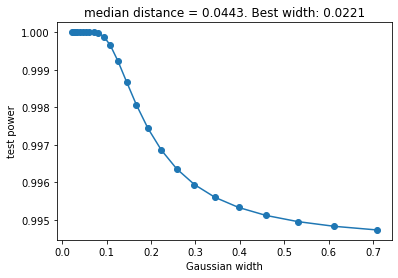

1 2


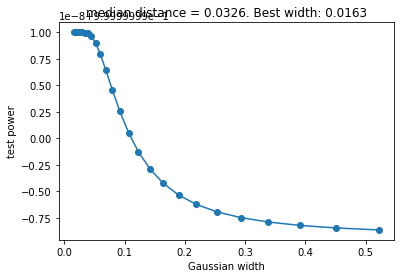

2 3


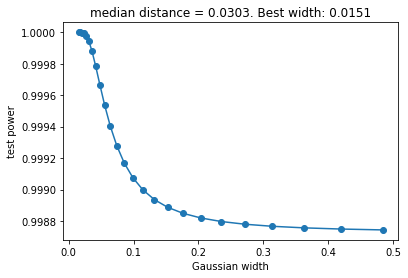

3 4


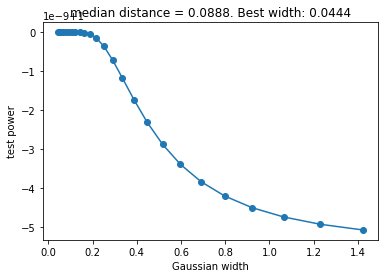

4 5


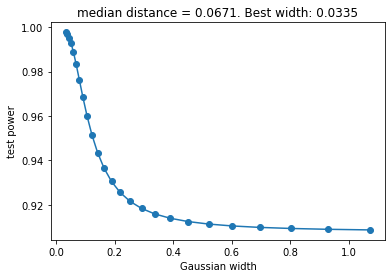

5 6


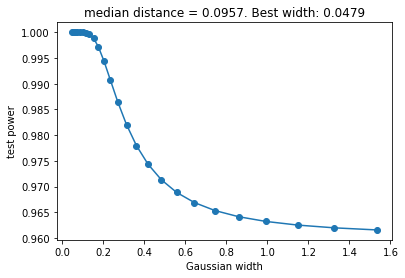

6 7


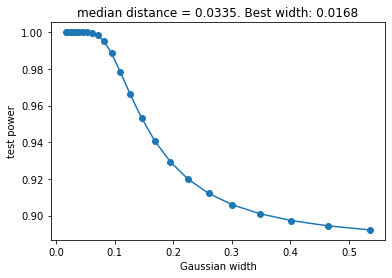

7 8


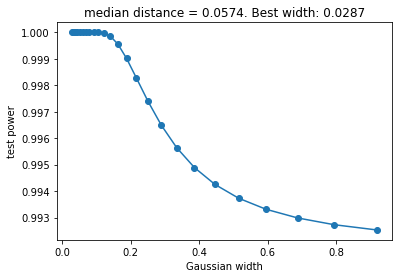

8 9


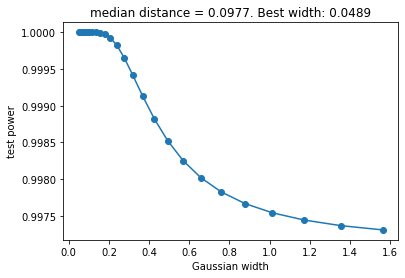

9 10


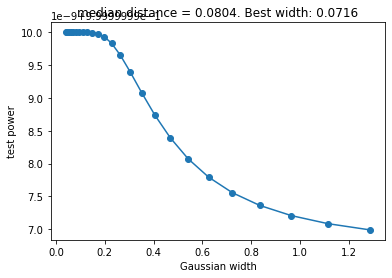

10 11


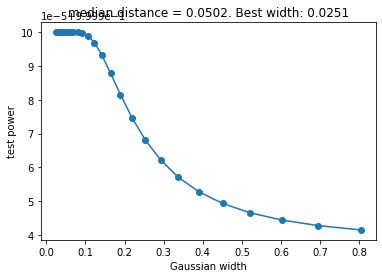

11 12


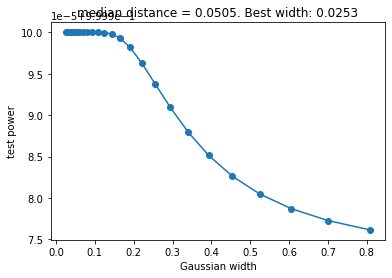

12 13


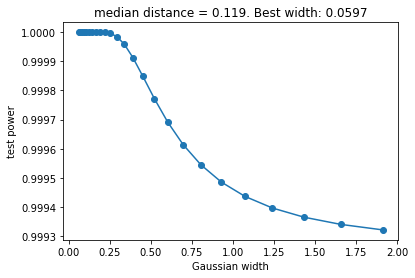

13 14


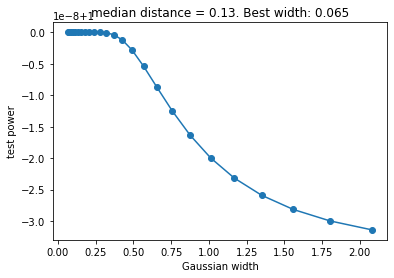

14 15


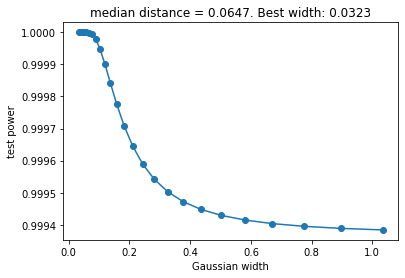

15 16


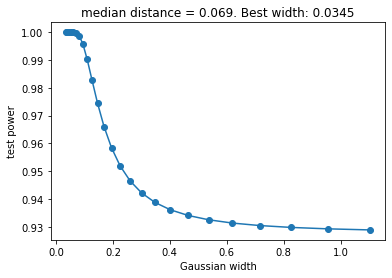

16 17


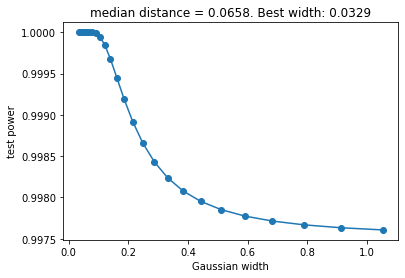

17 18


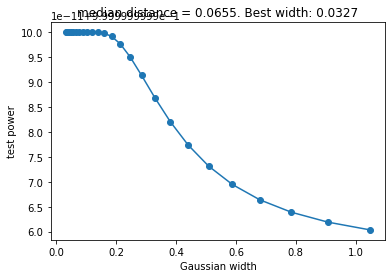

18 19


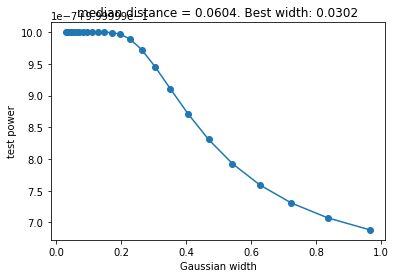

19 20


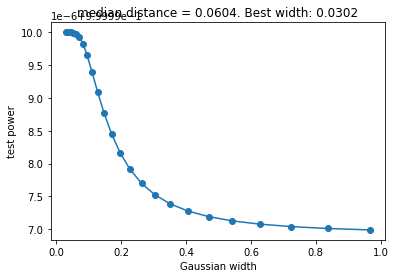

20 21


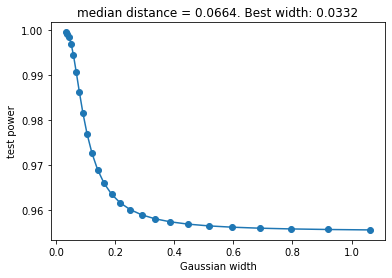

21 22


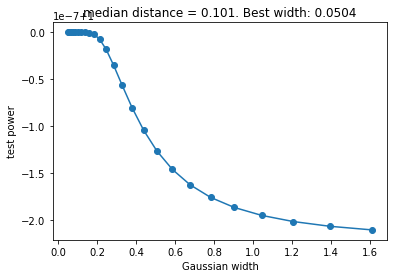

22 23


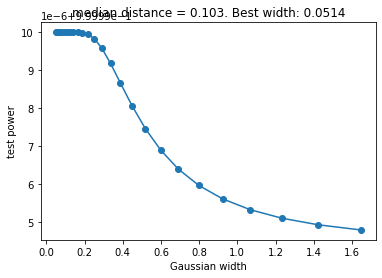

23 24


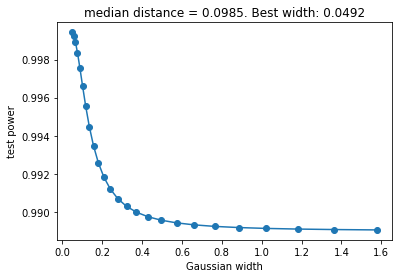

24 25


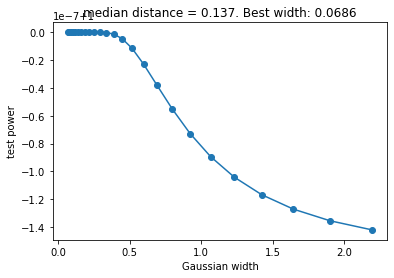

25 26


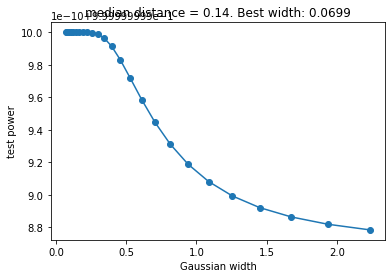

26 27


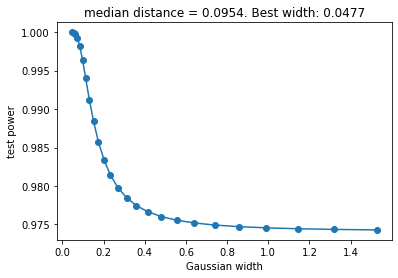

27 28


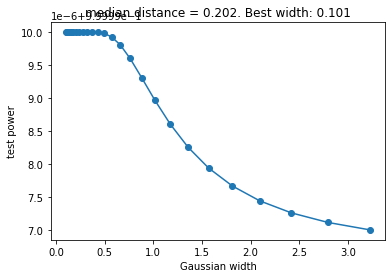

28 29


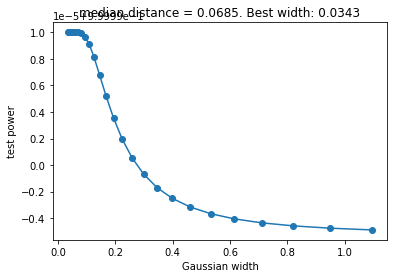

29 30


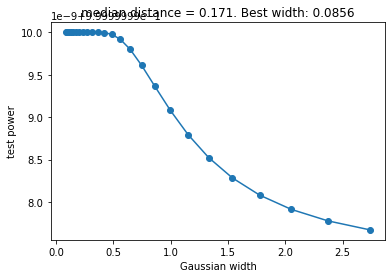

In [23]:
test_results_one_dict = defaultdict(dict)
test_results_two_dict = defaultdict(dict)
for start_point in range(0, 30):
    end_point = start_point + shift
    end_point_2 = (end_point + shift*2)
    print(start_point, end_point)
    X = np.asanyarray(choiceDf.iloc[:, start_point:end_point])
    Y = np.asanyarray(choiceDf.iloc[:, (start_point+1):(end_point+1)]) 
    Z = np.array(choiceDf.iloc[:, start_point + window:end_point + window])
    data_sample = data.TSTData(X, Y)  # data to train the model
    test_data_one  = data.TSTData(X, Z)
    test_data_two  = data.TSTData(Y, Z)

    tr, te = data_sample.split_tr_te(tr_proportion=0.9, seed=100)

    # choose the best kernel that maximizes the test power
    med = util.meddistance(tr.stack_xy())

    tr, te = data_sample.split_tr_te(tr_proportion=0.9, seed=100)

    # choose the best kernel that maximizes the test power
    med = util.meddistance(tr.stack_xy())

    widths = [(med * f) for f in 2.0 ** np.linspace(-1, 4, 25)]
    list_kernels = [kernel.KGauss(w ** 2) for w in widths]

    besti, powers = tst.LinearMMDTest.grid_search_kernel(tr, list_kernels, alpha=0.01)
    # print(list_kernels)
    plt.plot(widths, powers, 'o-')
    plt.xlabel('Gaussian width')
    plt.ylabel('test power')
    plt.title('median distance = %.3g. Best width: %.3g' % (med, widths[besti]))
    plt.show()
    test_data_one  = data.TSTData(X, Z)
    test_data_two  = data.TSTData(Y, Z)

    # The actual test
    best_ker = list_kernels[besti]
    lin_mmd_test = tst.LinearMMDTest(best_ker, alpha=0.01)
    # test_result_one = lin_mmd_test.perform_test(test_data_one)
    # test_result_two = lin_mmd_test.perform_test(test_data_two)

    # Test 1 Results Dict
    test_results_one_dict[start_point]['widths'] = widths
    test_results_one_dict[start_point]['med'] = med
    test_results_one_dict[start_point]['widths'] = widths
    test_results_one_dict[start_point]['besti'] = besti
    test_results_one_dict[start_point]['powers'] = powers

    test_results_one_dict[start_point]['med_on_test_data'] = util.meddistance(test_data_one.stack_xy())
    test_results_one_dict[start_point]['test_result'] = lin_mmd_test.perform_test(test_data_one)
    test_results_one_dict[start_point]['test_variance'] = lin_mmd_test.variance(X, Z, best_ker)  # test variance
    test_results_one_dict[start_point]['two_moments'] = lin_mmd_test.two_moments(X, Z, best_ker)  # test variance
    test_results_one_dict[start_point]['compute_unbiased_linear_estimator'] = lin_mmd_test.compute_stat(test_data_one)

    # Test 2 Results Dict
    test_results_two_dict[start_point]['test_result'] = lin_mmd_test.perform_test(test_data_two)
    test_results_two_dict[start_point]['test_variance'] = lin_mmd_test.variance(Y, Z, best_ker)
    test_results_two_dict[start_point]['med_on_test_data'] = util.meddistance(test_data_two.stack_xy())  # test variance
    test_results_two_dict[start_point]['two_moments'] = lin_mmd_test.two_moments(Y, Z, best_ker)  # test variance
    test_results_two_dict[start_point]['compute_unbiased_linear_estimator'] = lin_mmd_test.compute_stat(test_data_two)




In [ ]:
# Plot all the lines in one plot
for power in powers:
    plt.plot(widths, power)

# Customize plot appearance
plt.xlabel('Gaussian width')
plt.ylabel('test power')
plt.title('median distance = %.3g' % med)

In [ ]:

# Plot the lines
for i, (width, power) in enumerate(zip(widths, powers)):
    linestyle = '-' if i == besti else '--'
    linewidth = 2 if i == besti else 1
    plt.plot(widths, powers, linestyle, linewidth=linewidth)

    # Customize plot appearance
    plt.xlabel('Gaussian width')
    plt.ylabel('test power')
    plt.title('median distance = %.3g. Best width: %.3g' % (med, widths[besti]))

# Show the plot
plt.show()

In [ ]:
# Extract relevant data and create a DataFrame
dataOne = []
for key, value in test_results_one_dict.items():
    row = [
        key,
        value["med"],
        value["med_on_test_data"],
        value["test_result"]["alpha"],
        value["test_result"]["pvalue"],
        value["test_result"]["test_stat"],
        value["test_result"]["h0_rejected"],
    ]
    dataOne.append(row)

# Define column names
columns = [
    "Key",
    "Med",
    "Med_on_test_data",
    "Alpha",
    "P-value",
    "Test_stat",
    "H0_rejected",
]


In [ ]:
dataTwo = []
for key, value in test_results_two_dict.items():
    row = [
        key,
#         value["med"],
        value["med_on_test_data"],
        value["test_result"]["alpha"],
        value["test_result"]["pvalue"],
        value["test_result"]["test_stat"],
        value["test_result"]["h0_rejected"],
    ]
    dataTwo.append(row)


In [ ]:
# Create DataFrame
df = pd.DataFrame(data, columns=columns)


In [ ]:
df